In [1]:
from autode.evaluation import *
from autode.datagenerators import *
from autode.optimizers import *

## Predator-Pray

Considerer the linear system
$$ \dfrac{dx_1}{dt}=-0.16x_1+0.08x_1x_2$$
$$ \dfrac{dx_2}{dt}=4.5x_2-0.9x_1x_2$$
with $x_1(0)=4$ and $x_2(0)=4$.


### Numerical solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
step_size = 100
t = np.linspace(0,20,step_size)
gen = PredatoryDataGenerator()
obs = gen.generate_orig(t)

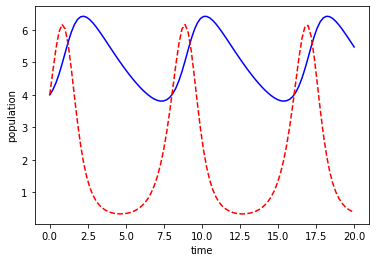

In [4]:
plt.plot(t, obs[:,0], 'b-')
plt.plot(t, obs[:,1], 'r--')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

In [5]:
evaluator = ODEINTEvaluator(t, obs)

### Four variable parameters

In [ ]:
print("Final Error:", evaluator.evaluate([lambda x1, x2, t, a, b: a*x1 + b*x1*x2, lambda x1, x2, t, c, d: c*x2 + d*x1*x2],attempts_per_exponent=1000))

In [ ]:
%%time
evaluator.params_for_last_model

#### Result
No convergence

Time: about three-and-half hours
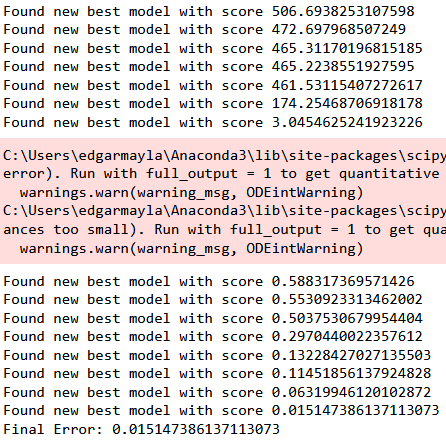
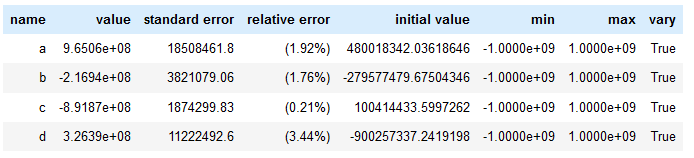

### Three variable parameters

In [ ]:
print("Final Error:", evaluator.evaluate([lambda x1, x2, t, b: -0.16*x1 + b*x1*x2, lambda x1, x2, t, c, d: c*x2 + d*x1*x2],attempts_per_exponent=1000))

In [ ]:
%%time
evaluator.params_for_last_model

### Results
Time: about one hour
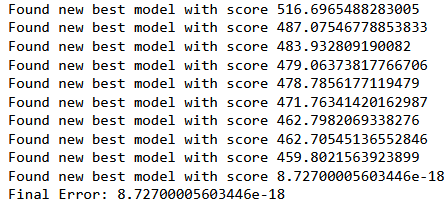
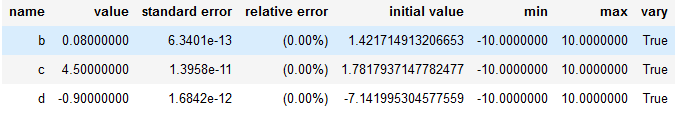

In [6]:
def h(xs, t, ps):
    try:
        b = ps['b'].value
        c = ps['c'].value
        d = ps['d'].value
    except:
        b, c, d = ps
    x1,x2 = xs

    return [-0.16*x1 + b*x1*x2, c*x2 + d*x1*x2]
def g2(t, x0, ps):
    #Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    x = odeint(h, x0, t, args=(ps,))
    return x

In [7]:
x0 = [4,4]
data = obs
params = Parameters()

def residual2(ps, x0, ts, data):
    model = g2(ts, x0, ps)
    return np.sum(np.power((model - data),2))

In [25]:
caja = 4 #Extension -caja a caja
particion = 10
xdata = np.linspace(-caja,caja,particion)
ydata = np.linspace(-caja,caja,particion)
zdata = np.linspace(-caja,caja,particion)
P = {}
for i in range (particion):
    for j in range(particion):
        for k in range(particion):
            params.add('b', xdata[i])
            params.add('c', ydata[j])
            params.add('d', zdata[k])
            P[i,j,k] = residual2(params, x0, t, data)

<ipython-input-7-0bddcce4cd2f>:7: RuntimeWarning: overflow encountered in power
  return np.sum(np.power((model - data),2))


In [26]:
temp = min(P.values())
res = [key for key in P if P[key] == temp]

In [27]:
res

[(20, 39, 15)]

In [28]:
#Recovering best score
Delta = 2*caja/(particion-1)
A = -caja + (Delta*res[0][0])
B = -caja + (Delta*res[0][1])
C = -caja + (Delta*res[0][2])

In [41]:
A = 1
B = 10
C = -1

In [34]:
[A,B,C]

[0.1, 1, -1]

In [42]:
params.add('b', A)
params.add('c', B)
params.add('d', C)
print(residual2(params, x0, t, data))

8923.978221312755


In [36]:
def residual(ps, x0, ts, data):
    model = g2(ts, x0, ps)
    return (model - data).ravel()

In [15]:
from lmfit import minimize, Parameters, Parameter, report_fit

In [43]:
# set parameters incluing bounds
params = Parameters()
params.add('b', value= A, min=-10, max=10)
params.add('c', value= B, min=-10, max=10)
params.add('d', value= C, min=-10, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(x0, t, data), method='leastsq',max_nfev = 1000)

report_fit(result)
print("----------------")

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 114
    # data points      = 200
    # variables        = 3
    chi-square         = 1288.00406
    reduced chi-square = 6.53809167
    Akaike info crit   = 378.506338
    Bayesian info crit = 388.401290
[[Variables]]
    b:  0.45538164 +/- 0.00293095 (0.64%) (init = 1)
    c: -7.34453154 +/- 0.20267412 (2.76%) (init = 10)
    d:  0.95615672 +/- 0.03882720 (4.06%) (init = -1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, d) = -1.000
    C(b, d) = -1.000
    C(b, c) =  1.000
----------------


In [17]:
xdata

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

### Two variable parameters

In [ ]:
print("Final Error:", evaluator.evaluate([lambda x1, x2, t, b: -0.16*x1 + b*x1*x2, lambda x1, x2, t, d: 4.5*x2 + d*x1*x2],attempts_per_exponent=1000))

In [ ]:
%%time
evaluator.params_for_last_model

### Result
Time: less than a minute
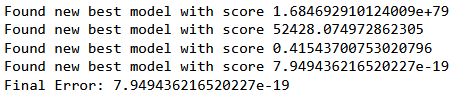
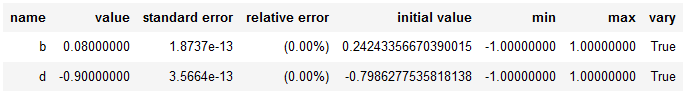

#### Error surface

In [ ]:
def h(xs, t, ps):
    try:
        b = ps['b'].value
        d = ps['d'].value
    except:
        b, d = ps
    x1,x2 = xs

    return [-0.16*x1 + b*x1*x2, 4.5*x2 + d*x1*x2]
def g2(t, x0, ps):
    #Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    x = odeint(h, x0, t, args=(ps,))
    return x
def residual(ps, x0, ts, data):
    model = g2(ts, x0, ps)
    return (model - data).ravel()

In [ ]:
from lmfit import minimize, Parameters, Parameter, report_fit

In [ ]:
# set parameters incluing bounds
params = Parameters()
params.add('b', value= 0.2424, min=-1, max=1)
params.add('d', value= -0.798, min=-1, max=1)

# fit model and find predicted values
result = minimize(residual, params, args=(x0, t, data), method='leastsq',max_nfev = 1000)

report_fit(result)
print("----------------")

In [ ]:
size = 30
Z=[]
for i in range (size):
        Z.append([0]*size)
    
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

bdata = np.linspace(0,0.1,size)
ddata = np.linspace(-1,-0.8,size)
X,Y = np.meshgrid(bdata,ddata)
for i in range(size):
    for j in range(size):
        params.add('b', bdata[i])
        params.add('d', ddata[j])
        Z[i][j] = residual2(params, x0, t, data)
W = np.array(Z)

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(6,6)) 
axes = fig.gca(projection ='3d') 
axes.plot_surface(X, Y, W) 
axes.set_zlim([0,2000]) 
plt.show()

#### Other solvers

##### Mínimos cuadrados